# Dimension Reduction

In this notebook we will a look at three tecniques to reduce the dimensions of a dataset:

* **Principal Component Analysis (PCA)** for unsupervized data compression
* **Linear Discriminat Analysis (LDA)** for supervized dimensionality reduction
* **Kernel Principal Component Analysis (KPCA)** nonlinear dimensionality reduction

***

## Principal Component Analysis (PCA)

PCA is a linear unsupervized tecnique that performs feature extration of d-dimensions data by selecting the most relevant k features of a dataset. Ussually, k << d.

### Main steps behind PCA

1. Standardize the d-dimensional dataset
2. Construct the covariance matrix
3. Decompose the covariance matrix into its eigenvalues and eigenvectors
4. Sort the eigenvalues in decreasing order to rank the corresponding eigenvectors
5. Select k eigenvectors which corresponds to the k largest eigenvalues
6. Construct a projection matrix $w$ from the "top" k eigenvectors
7. Transform the d-dimensional input X using the projection matrix $w$ to obtain a new k-dimensional subspace.

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
wine = load_wine()

In [4]:
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])

In [5]:
x, y = wine['data'], wine['target']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1, test_size=0.3)

In [7]:
std = StandardScaler()

In [8]:
x_train_std, x_test_std = std.fit_transform(x_train), std.transform(x_test)

In [9]:
cov_mat = np.cov(x_train_std.T)

In [10]:
eigen_vals, eigen_vects = np.linalg.eig(cov_mat)

In [11]:
eigen_vals

array([4.7095539 , 2.63606471, 1.55728758, 0.93422662, 0.85129454,
       0.5709688 , 0.46462025, 0.37764772, 0.10409155, 0.14951983,
       0.21165109, 0.2630501 , 0.27571434])

In [12]:
eigen_vects

array([[-0.14119433,  0.46732089, -0.18497972,  0.06135175,  0.25730345,
         0.35704654,  0.12129238,  0.35842237,  0.00627487, -0.12888373,
         0.26913886, -0.45815942, -0.29636449],
       [ 0.24946815,  0.26876924,  0.11558438, -0.50736306,  0.04631822,
         0.44728114, -0.50008396,  0.01883529, -0.12812954,  0.06731754,
        -0.25722819,  0.22011017, -0.08089203],
       [-0.05104853,  0.27660192,  0.62580603,  0.23358668,  0.07939612,
         0.18115394,  0.12514686, -0.24258145,  0.20791123, -0.12011171,
         0.36451474,  0.40582112, -0.07645806],
       [ 0.19890851, -0.01955098,  0.63022498, -0.06619111, -0.14036996,
        -0.06552435,  0.28824897,  0.49700581, -0.1131201 , -0.0232868 ,
        -0.30770306, -0.27644343,  0.14123878],
       [-0.1444494 ,  0.32120489,  0.06808315,  0.21808618, -0.75131283,
        -0.09253292, -0.41586303, -0.06557898, -0.01561131,  0.01819235,
         0.09054263, -0.25269866,  0.02931993],
       [-0.40472564,  0.048393

### Total explained variance

$$\frac{\lambda_j}{\sum\limits_{j=1}^{d}\lambda_j}$$

In [13]:
tot = sum(eigen_vals)

var_exp_ratio = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp_ratio = np.cumsum(var_exp_ratio)

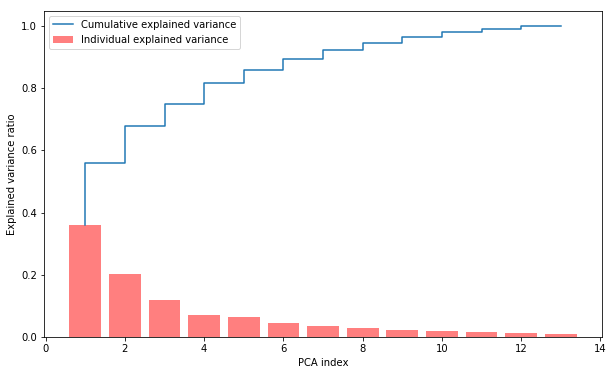

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, 14), var_exp_ratio, label='Individual explained variance', alpha=0.5, color='red')
ax.step(range(1, 14), cum_var_exp_ratio, label='Cumulative explained variance')
ax.set_xlabel('PCA index')
ax.set_ylabel('Explained variance ratio')
ax.legend(loc='best')
plt.show()

### Feature Transformation

In [15]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vects[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key= lambda k:k[0], reverse=True)

In [16]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w

array([[-0.14119433,  0.46732089],
       [ 0.24946815,  0.26876924],
       [-0.05104853,  0.27660192],
       [ 0.19890851, -0.01955098],
       [-0.1444494 ,  0.32120489],
       [-0.40472564,  0.04839313],
       [-0.42654202, -0.00936768],
       [ 0.29573373,  0.00146817],
       [-0.32620144,  0.04087554],
       [ 0.07420694,  0.53982087],
       [-0.29277478, -0.27536907],
       [-0.37482201, -0.19149315],
       [-0.2889145 ,  0.34828709]])

In [17]:
x_train_pca = x_train_std.dot(w)

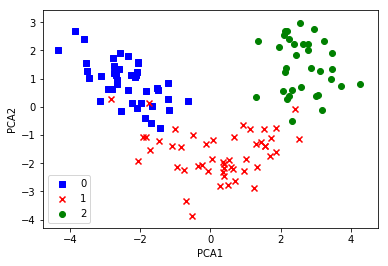

In [18]:
colors = ['blue', 'red', 'green']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train==l, 0], x_train_pca[y_train==l, 1], c=c, label=l, marker=m)
    
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

### PCA in Scikit-learn

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
x_train_std_pca, x_test_std_pca = pca.fit_transform(x_train_std), pca.transform(x_test_std)

In [22]:
lrg = LogisticRegression()

In [23]:
lrg.fit(x_train_std_pca, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

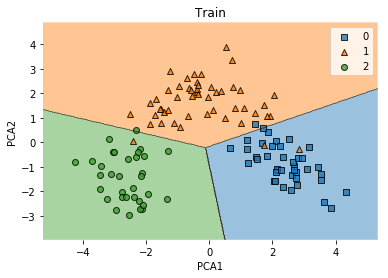

In [24]:
plot_decision_regions(x_train_std_pca, y_train, lrg)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Train')
plt.legend(loc='best')
plt.show()

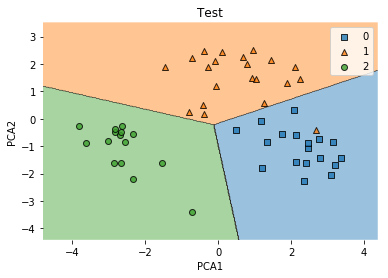

In [25]:
plot_decision_regions(x_test_std_pca, y_test, lrg)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Test')
plt.legend(loc='best')
plt.show()

# Linear Discriminant Analysis (LDA)

### The inner working of LDA

1. Standardize the d-dimensional dataset
2. For each class, compute the d-dimensional mean vactor
3. Construct the between class scatter matrix , $S_B$, and within class scatter matrix, $S_W$
4. Compute the eigenvectors and corresponding eigenvalues of the vector $S_{B}^{-1}S_{w}$
5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
6. Chose the k eigenvectors that corresponds to k largest eigenvalues to construct a transforation matrix $W$
7. Project the sample of input $X$ onto a new feature subspace using the transformation matrix $W$

### Computing the scatter matrix $W$

In [26]:
np.set_printoptions(precision=4)

mean_vecs = []

for label in range(3):
    mean_vecs.append(np.mean(x_train_std[y_train == label], axis=0))
    print("MV %s: %s\n" %(label, mean_vecs[label]))

MV 0: [ 0.8998 -0.36    0.301  -0.743   0.4679  0.9176  0.9809 -0.6287  0.6403
  0.2018  0.4958  0.7642  1.1697]

MV 1: [-0.9191 -0.3613 -0.367   0.2926 -0.4362 -0.1187  0.0098  0.1098 -0.0235
 -0.8556  0.372   0.2343 -0.7699]

MV 2: [ 0.2748  0.9947  0.1821  0.4798  0.0796 -0.9602 -1.2334  0.6148 -0.7599
  1.0456 -1.1796 -1.3044 -0.2868]



In [27]:
np.unique(y_train)

array([0, 1, 2])

In [28]:
x_train_std.shape[1]

13

In [29]:
make_circles?

In [35]:
x, y = make_circles(n_samples=1000, random_state=42, noise=0.1, factor=0.2)

In [41]:
x.shape, y.shape

((1000, 2), (1000,))

In [43]:
x

array([[ 0.1329,  0.1282],
       [-0.0867,  0.1097],
       [-0.2708,  0.2685],
       ...,
       [ 0.0059, -0.2771],
       [ 0.6373, -0.8574],
       [ 0.2718,  0.9762]])

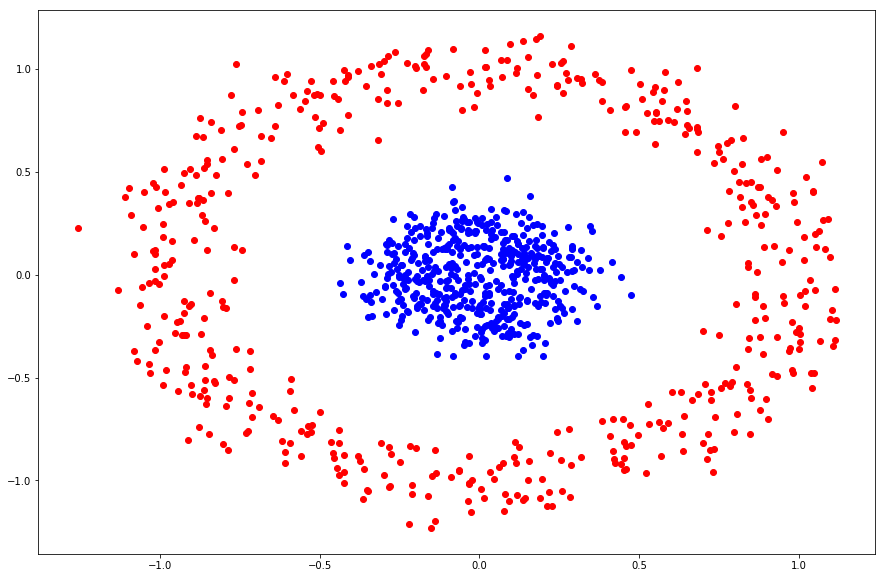

In [44]:
plt.subplots(figsize=(15,10))
plt.scatter(x[y==0, 0], x[y==0, 1], color='red')
plt.scatter(x[y==1, 0], x[y==1, 1], color='blue')
plt.show()

In [45]:
KernelPCA?

In [46]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

In [47]:
x_kpca = kpca.fit_transform(x)

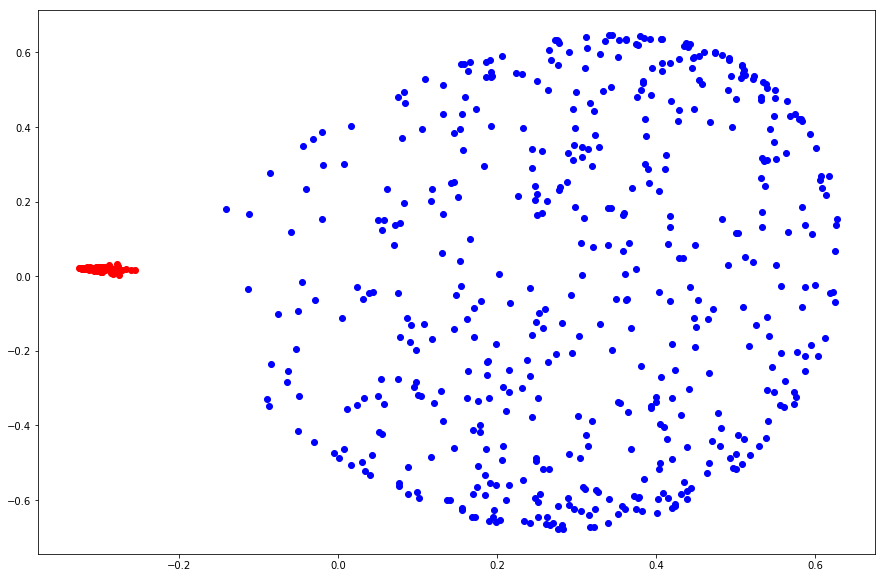

In [48]:
plt.subplots(figsize=(15,10))
plt.scatter(x_kpca[y==0, 0], x_kpca[y==0, 1], color='red')
plt.scatter(x_kpca[y==1, 0], x_kpca[y==1, 1], color='blue')
plt.show()